In [1]:
#em algorithm

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [4]:
RANDOM_STATE = 42
PLOTS_DIR = "plots_em"
os.makedirs(PLOTS_DIR, exist_ok=True)

In [5]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")
target_names = iris.target_names

print("Dataset Shape:", X.shape)
print("Class Distribution:\n", y.value_counts())

Dataset Shape: (150, 4)
Class Distribution:
 target
0    50
1    50
2    50
Name: count, dtype: int64


In [6]:
print("\nChecking for missing values:\n", X.isnull().sum())


Checking for missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


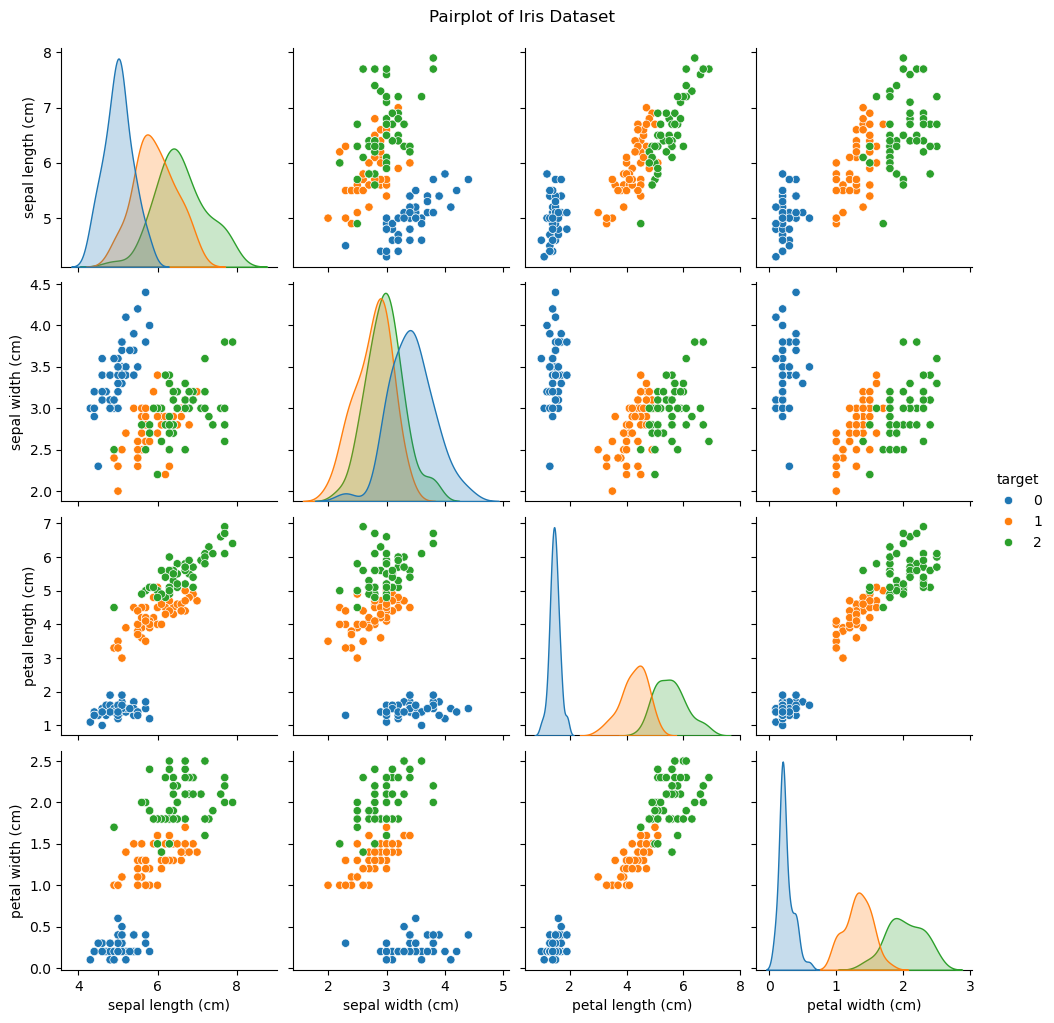

In [8]:
sns.pairplot(pd.concat([X, y], axis=1), hue="target", palette="tab10")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

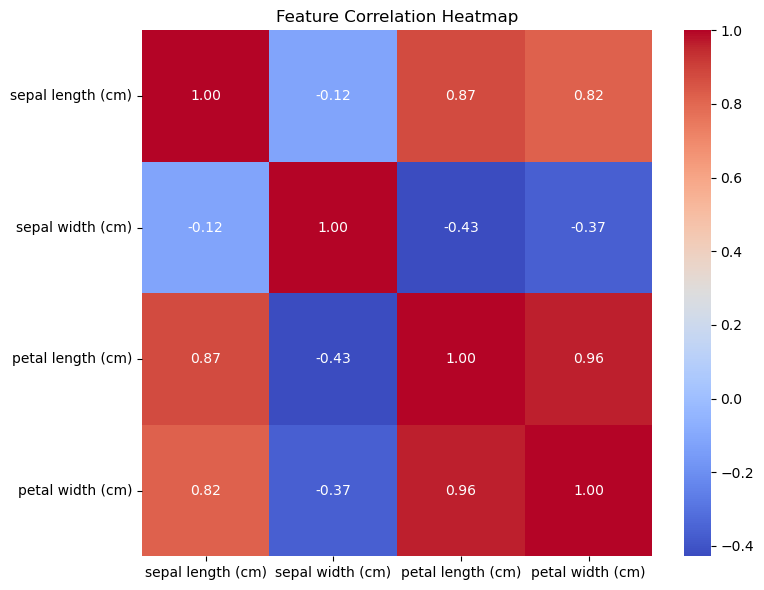

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

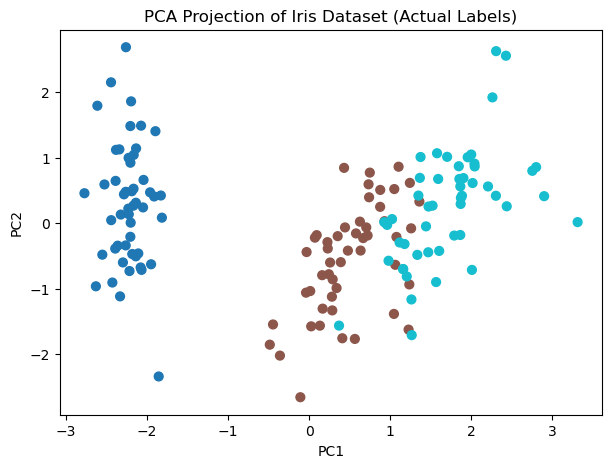

In [12]:
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="tab10", s=40)
plt.title("PCA Projection of Iris Dataset (Actual Labels)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [13]:
n_components_range = range(1, 10)
aic_scores, bic_scores, sil_scores = [], [], []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=RANDOM_STATE)
    gmm.fit(X_scaled)
    aic_scores.append(gmm.aic(X_scaled))
    bic_scores.append(gmm.bic(X_scaled))
    if n > 1:
        labels = gmm.predict(X_scaled)
        sil_scores.append(silhouette_score(X_scaled, labels))
    else:
        sil_scores.append(np.nan)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

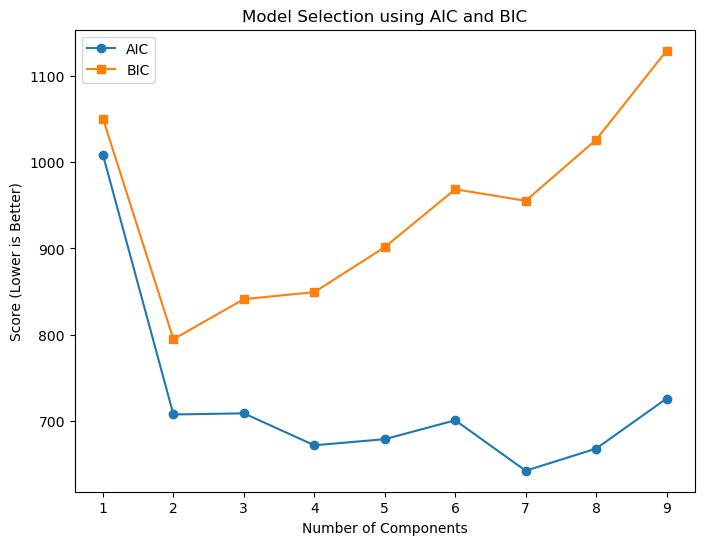

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, aic_scores, marker='o', label="AIC")
plt.plot(n_components_range, bic_scores, marker='s', label="BIC")
plt.title("Model Selection using AIC and BIC")
plt.xlabel("Number of Components")
plt.ylabel("Score (Lower is Better)")
plt.legend()
plt.show()


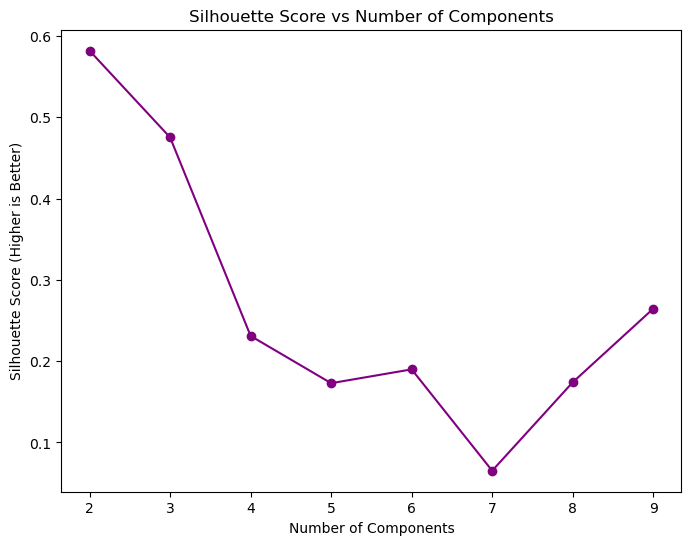

In [15]:

plt.figure(figsize=(8, 6))
plt.plot(n_components_range, sil_scores, marker='o', color='purple')
plt.title("Silhouette Score vs Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Silhouette Score (Higher is Better)")
plt.show()

In [16]:
best_n = n_components_range[np.argmin(bic_scores)]
print("\nBest number of clusters (by BIC):", best_n)


Best number of clusters (by BIC): 2


In [17]:
gmm = GaussianMixture(n_components=best_n, random_state=RANDOM_STATE)
gmm.fit(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=2, random_state=42)

In [18]:
cluster_labels = gmm.predict(X_scaled)
X["Cluster"] = cluster_labels

print("\nCluster counts:\n", X["Cluster"].value_counts())


Cluster counts:
 Cluster
0    100
1     50
Name: count, dtype: int64


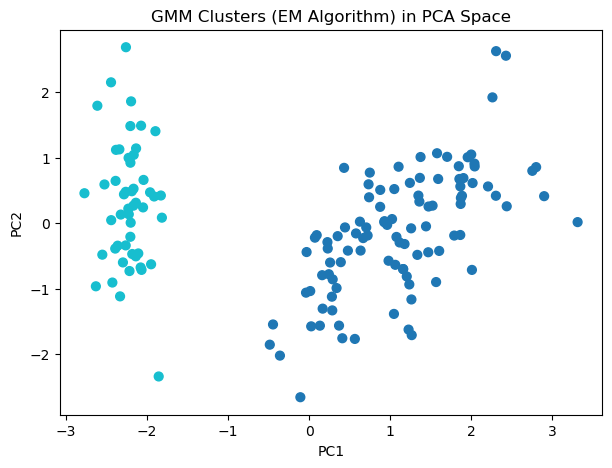

In [19]:
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap="tab10", s=40)
plt.title("GMM Clusters (EM Algorithm) in PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

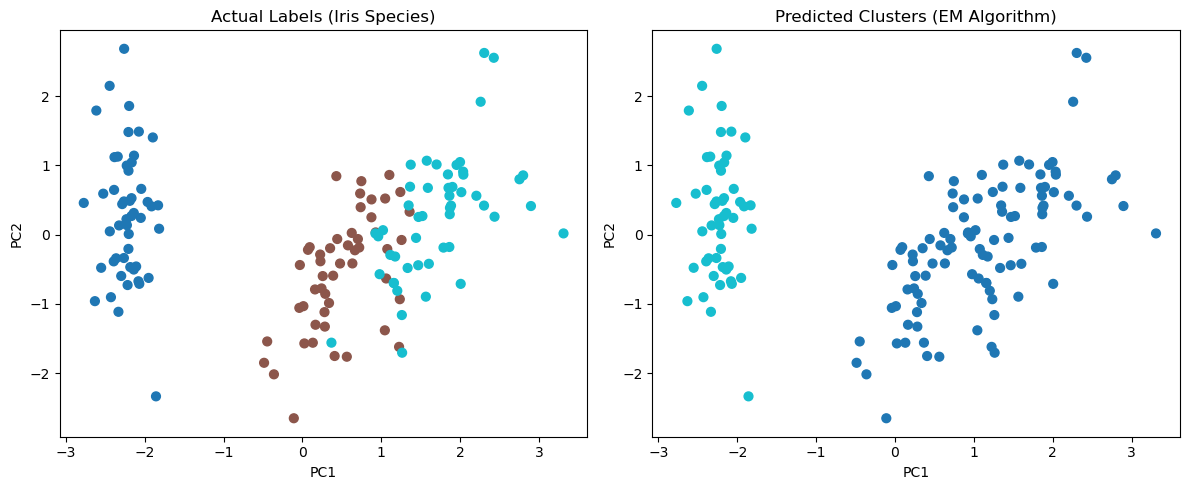

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="tab10", s=40)
axes[0].set_title("Actual Labels (Iris Species)")
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap="tab10", s=40)
axes[1].set_title("Predicted Clusters (EM Algorithm)")
for ax in axes:
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
plt.tight_layout()
plt.show()

In [21]:
print("\nModel Evaluation Metrics:")
print("AIC:", gmm.aic(X_scaled))
print("BIC:", gmm.bic(X_scaled))
print("Silhouette Score:", silhouette_score(X_scaled, cluster_labels))


Model Evaluation Metrics:
AIC: 707.4005788301528
BIC: 794.7090023589442
Silhouette Score: 0.5817500491982808
